### Exploratory Data Analysis of Amazon Product Listings

Data pulled from data.world

In [1]:
import pandas as pd

data_url = r'https://query.data.world/s/wrmtdysqvclju4fqqztki5hk2w3poz'
data = pd.read_csv(data_url)
data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
uniq_id                                        10000 non-null object
product_name                                   10000 non-null object
manufacturer                                   9993 non-null object
price                                          8565 non-null object
number_available_in_stock                      7500 non-null object
number_of_reviews                              9982 non-null object
number_of_answered_questions                   9235 non-null float64
average_review_rating                          9982 non-null object
amazon_category_and_sub_category               9310 non-null object
customers_who_bought_this_item_also_bought     8938 non-null object
description                                    9349 non-null object
product_information                            9942 non-null object
product_description                            9349 non-null object
items

In [2]:
data.head()

,uniq_id,product_name,manufacturer,price,number_available_in_stock,number_of_reviews,number_of_answered_questions,average_review_rating,amazon_category_and_sub_category,customers_who_bought_this_item_also_bought,description,product_information,product_description,items_customers_buy_after_viewing_this_item,customer_questions_and_answers,customer_reviews,sellers
0,eac7efa5dbd3d667f26eb3d3ab504464,Hornby 2014 Catalogue,Hornby,£3.42,5 new,15,1.0,4.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,Product Description Hornby 2014 Catalogue Box ...,Technical Details Item Weight640 g Product Dim...,Product Description Hornby 2014 Catalogue Box ...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,Does this catalogue detail all the previous Ho...,Worth Buying For The Pictures Alone (As Ever) ...,"{""seller""=>[{""Seller_name_1""=>""Amazon.co.uk"", ..."
1,b17540ef7e86e461d37f3ae58b7b72ac,FunkyBuys® Large Christmas Holiday Express Fes...,FunkyBuys,£16.99,NaN,2,1.0,4.5 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Christmas-Holiday-Expr...,Size Name:Large FunkyBuys® Large Christmas Hol...,Technical Details Manufacturer recommended age...,Size Name:Large FunkyBuys® Large Christmas Hol...,http://www.amazon.co.uk/Christmas-Holiday-Expr...,can you turn off sounds // hi no you cant turn...,Four Stars // 4.0 // 18 Dec. 2015 // By\n \...,"{""seller""=>{""Seller_name_1""=>""UHD WHOLESALE"", ..."
2,348f344247b0c1a935b1223072ef9d8a,CLASSIC TOY TRAIN SET TRACK CARRIAGES LIGHT EN...,ccf,£9.99,2 new,17,2.0,3.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Classic-Train-Lights-B...,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,Technical Details Manufacturer recommended age...,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,http://www.amazon.co.uk/Train-With-Tracks-Batt...,What is the gauge of the track // Hi Paul.Trut...,**Highly Recommended!** // 5.0 // 26 May 2015 ...,"{""seller""=>[{""Seller_name_1""=>""DEAL-BOX"", ""Sel..."
3,e12b92dbb8eaee78b22965d2a9bbbd9f,HORNBY Coach R4410A BR Hawksworth Corridor 3rd,Hornby,£39.99,NaN,1,2.0,5.0 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,NaN,Hornby 00 Gauge BR Hawksworth 3rd Class W 2107...,Technical Details Item Weight259 g Product Dim...,Hornby 00 Gauge BR Hawksworth 3rd Class W 2107...,NaN,NaN,I love it // 5.0 // 22 July 2013 // By\n \n...,NaN
4,e33a9adeed5f36840ccc227db4682a36,Hornby 00 Gauge 0-4-0 Gildenlow Salt Co. Steam...,Hornby,£32.19,NaN,3,2.0,4.7 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Hornby-R6367-RailRoad-...,Product Description Hornby RailRoad 0-4-0 Gild...,Technical Details Item Weight159 g Product Dim...,Product Description Hornby RailRoad 0-4-0 Gild...,http://www.amazon.co.uk/Hornby-R2672-RailRoad-...,NaN,Birthday present // 5.0 // 14 April 2014 // By...,NaN


### Goal

* Summarize products by Category, Sub Category and Manufacturer
* Find the most reviewed products and parse raitings
* Transform prices to US dollars

In [9]:
unique_category_list = data['amazon_category_and_sub_category'].unique()
unique_category_grouper = data.groupby('amazon_category_and_sub_category')
unique_category_grouper[['uniq_id']].count().sort_values(by='uniq_id', ascending=False)

,uniq_id
amazon_category_and_sub_category,
Die-Cast & Toy Vehicles > Toy Vehicles & Accessories > Scaled Models > Vehicles,880
Figures & Playsets > Science Fiction & Fantasy,485
Arts & Crafts > Children's Craft Kits > Bead Art & Jewellery-Making,368
Characters & Brands > Disney > Toys,347
Hobbies > Trading Cards & Accessories > Packs & Sets,317
Games > Dice & Dice Games,298
Party Supplies > Decorations > Balloons,293
"Party Supplies > Banners, Stickers & Confetti > Banners",278
Games > Card Games,242


In [10]:
parsed_categories = data['amazon_category_and_sub_category'].str.split('>', expand=True)
parsed_categories.columns = ['category', 'sub_category', 'dept', 'class', 'sub_class']

df = parsed_categories.merge(data, how='inner', left_index=True, right_index=True)

In [11]:
df_clean = df.copy().dropna(subset=['price']).reset_index(drop=True)

df_clean = df_clean.loc[~df_clean['price'].str.contains(' - '), :] # excluding receords with price range

df_clean['price'] = df_clean['price'].str.lstrip('£')\
                                     .str.replace(',', '')\
                                     .astype('float')

df_clean['price_usd'] = df_clean['price'].apply(lambda x: round(float(x * 1.11), 2)) # approxamite conversion from Euros to USD

In [12]:
df_clean['rating'] = df_clean['average_review_rating'].apply(lambda x: float(x.split()[0]) if x==x else x) # apply function if not nan

In [13]:
def summarize_clean_df_by(product_hierarchy_level):
    grouper = df_clean.groupby(product_hierarchy_level)
    return grouper.agg({'uniq_id': pd.Series.nunique, 'manufacturer': pd.Series.nunique, 'rating': 'mean', 'price': 'mean'})

In [14]:
summarized_df = summarize_clean_df_by(['manufacturer'])
summarized_df.loc[(summarized_df['uniq_id'] >= 10)].sort_values(by='price', ascending=False)

,uniq_id,manufacturer,rating,price
manufacturer,,,,
Hot Toys,10,1,4.880000,287.659000
AUTOart,29,1,4.965517,136.765172
Bachmann,17,1,4.841176,99.158824
Kotobukiya,15,1,4.933333,96.321333
Noble Collection,12,1,4.691667,85.728333
Star images,12,1,4.850000,80.884167
Steiff,12,1,4.825000,68.871667
Hornby,68,1,4.710294,68.148529
Weise-Toys,10,1,5.000000,62.598000


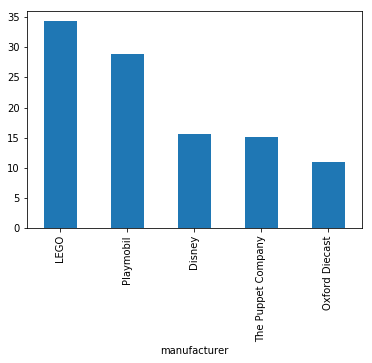

In [15]:
%matplotlib inline
summarized_df.loc[(summarized_df['uniq_id'] >= 100)].sort_values(by='price', ascending=False)['price'].plot(kind='bar')